# Portfolio returns

In [1]:
# Install and import pandas_datareader
import pandas as pd
import numpy as np
from pandas_datareader import DataReader as pdr
import yfinance as yf
import matplotlib.pyplot as plt
pd.options.display.float_format = '{:.2f}'.format

### Portfolio expected return

In [2]:
# Expected returns
mns = np.array([0.10, 0.05, 0.07])

# Portfolio weights
wgts = np.array([0.25, 0.5, 0.25])

#Portfolio expected return
port_expret = wgts @ mns
print(f'Portfolio Expected Return:\t {port_expret: ,.4f}')

Portfolio Expected Return:	  0.0675


### Portfolio risk (variance and standard deviation)

In [3]:
##### Inputs
# Standard deviations
sds = np.array([0.20, 0.12, 0.15])

# Correlations
corr12 = 0.3
corr13 = 0.3
corr23 = 0.3

# Portfolio weights
wgts = np.array([0.25, 0.5, 0.25])

In [4]:
##### Method 1 to calculate covariance matrix
# Covariances
cov12 = corr12 * sds[0] * sds[1]
cov13 = corr13 * sds[0] * sds[2]
cov23 = corr23 * sds[1] * sds[2]
# Covariance matrix
cov = np.array([[sds[0]**2,  cov12,     cov13], \
                [cov12,      sds[1]**2, cov23], \
                [cov13,      cov23,     sds[2]**2]])
cov

array([[0.04  , 0.0072, 0.009 ],
       [0.0072, 0.0144, 0.0054],
       [0.009 , 0.0054, 0.0225]])

In [5]:
##### Method 2 to calculate covariance matrix
# Correlation matrix
C  = np.identity(3)
C[0, 1] = C[1, 0] = corr12
C[0, 2] = C[2, 0] = corr13
C[1, 2] = C[2, 1] = corr23
# Covariance matrix
cov = np.diag(sds) @ C @ np.diag(sds)
cov 

array([[0.04  , 0.0072, 0.009 ],
       [0.0072, 0.0144, 0.0054],
       [0.009 , 0.0054, 0.0225]])

In [6]:
# Portfolio variance
port_var = wgts @ cov @ wgts
print(f'Portfolio Variance:\t {port_var: ,.4f}')

Portfolio Variance:	  0.0118


In [7]:
# Portfolio standard deviation
port_sd  = np.sqrt(port_var)
print(f'Portfolio Standard Deviation:\t {port_sd: ,.4f}')

Portfolio Standard Deviation:	  0.1085


## Realized portfolio returns (with rebalancing to target weights)

In [8]:
# Function to fetch a yahoo time-series
def returns(ticker):
    ret = yf.download(ticker, start='2000-01-01', end='2024-12-31', progress=False)
    ret = ret["Close"].resample("ME").last()
    ret = ret.pct_change()
    ret.columns = [ticker]
    return ret
aapl = returns('AAPL')
ibm = returns('IBM')

In [9]:
# Merging time-series
df = pd.merge(left=ibm,right=aapl,how='inner',left_index=True,right_index=True)
df

,IBM,AAPL
Date,,
2000-01-31,NaN,NaN
2000-02-29,-0.08,0.10
2000-03-31,0.15,0.18
2000-04-30,-0.06,-0.09
2000-05-31,-0.04,-0.32
...,...,...
2024-08-31,0.06,0.03
2024-09-30,0.09,0.02
2024-10-31,-0.06,-0.03


In [10]:
df.mean()
df.IBM.mean()
df.AAPL.mean()

0.026007824994661866

In [11]:
df.IBM.std()

0.07180570410286771

In [12]:
df.corr()

,IBM,AAPL
IBM,1.00,0.42
AAPL,0.42,1.00


Mean of  50.00% portfolio is:  1.65% (per month)
Mean of  75.00% portfolio is:  2.13% (per month)


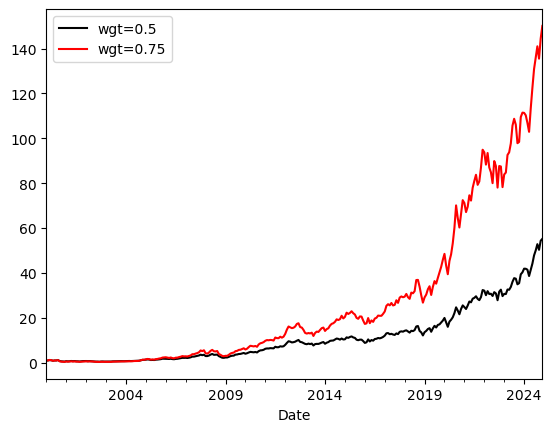

In [13]:
# How would different portfolios of AAPL and IBM have fared?
wgt = 0.5
df['retp'] = wgt*df.AAPL + (1-wgt)*df.IBM
df['cumretp'] = (1+df['retp']).cumprod()
print(f'Mean of {wgt: .2%} portfolio is: {df.retp.mean(): .2%} (per month)')
df.cumretp.plot(color='black', label='wgt=0.5')


wgt = 0.75
df['retp'] = wgt*df.AAPL + (1-wgt)*df.IBM
df['cumretp'] = (1+df['retp']).cumprod()
print(f'Mean of {wgt: .2%} portfolio is: {df.retp.mean(): .2%} (per month)')
df.cumretp.plot(color='red', label='wgt=0.75')
plt.legend()
plt.show()
